<a href="https://colab.research.google.com/github/alinavandreeva/alinavandreeva/blob/main/HW6_scraping_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [ ]:
'''
Импортируйте библиотеки для скрейпинга веб-страниц
'''
import requests
from bs4 import BeautifulSoup

In [ ]:
'''
Допишите функцию для скрейпинга
'''

def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url) ### ваш код здесь: выполните HTML-запрос ###
    if response.status_code == 200: ### ваш код здесь: если запрос успешный (возвращается значение 200) ###
      soup = BeautifulSoup(response.text, 'html.parser') ### ваш код здесь: парсим контент или текст с помощью BeautifulSoup html.parser ###
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = '' ### ваш код здесь: создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for p in paragraphs:### ваш код здесь: начинаем перебор элементов переменной paragraphs ###
        text += p.get_text() # извлекаем текстовые данные
      return text
    else: ### ваш код здесь: иначе ###
        print(f'Error: {response.status_code}') ### ваш код здесь: выводим статус-код и сообщение об ошибке ###

In [ ]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\nThe general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization of transformational-generative grammar (TGG).[1] Marcel-Paul Schützenberger also played a role in the development of the theory of formal languages; the paper "The algebraic theory of context free languages"[2] describes the modern hierarchy, including context-free grammars.[3]\nIndependently, alongside li

In [ ]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital fakeness is there to get the audience used to it...Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.The film isn’t very deep, but it d

**Задание 2**
Написать функцию для сентимент-анализа

In [ ]:
'''
Загружаем списки слов с положительным и отрицательным значением
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-11 15:50:09--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt’

neg.txt             100%[===================>]  43.71K  --.-KB/s    in 0.01s   

2024-12-11 15:50:10 (3.85 MB/s) - ‘neg.txt’ saved [44759/44759]

--2024-12-11 15:50:10--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Saving t

In [ ]:
'''
Создайте списки слов, разделив строку по знаку \n
'''

pos_list, neg_list = pos.split('\n'), neg.split('\n')

pos_list[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''

def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    text = text.lower() #приведите текст к нижнему регистру и поделите его на слова ###
    words = text.split()
    stopwords_en = set(stopwords.words('english'))
    words = [word.strip(string.punctuation) for word in words]
    words = [word for word in words if word not in stopwords_en]  #удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    ### Важно: запишите результат в переменную words ###

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
      return 'positive'#если положительный скор больше отрицательного, возвращаем строчку 'positive' ###
    elif positive_count < negative_count:
      return 'negative'### Ваш код здесь: если отрицательный скор больше положительного, возвращаем строчку 'negative' ###
    else:
      return 'neutral'### Иначе возвращаем строчку 'neutral' ###

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

analyze_sentiment('This sample text is awesome!', pos_list, neg_list)

'positive'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 2
'''

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [ ]:
'''
Проверяем функцию для анализа тональности: пример 3
'''

analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

**Задача 3**

Написать функцию для вывода сентимент-скоров

In [ ]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_=None) ###примените функцию scrape_text_from_url ###
  sentences = scraped_text.split('.') ###сегментируйте текст по предложениям (через точку) ###
  sentiments = [] ###создаем пустой список, куда запишем скоры ###
  for sentence in sentences:###начинаем перебор по предложениям ###
    score = analyze_sentiment(sentence, positive_words, negative_words) ###получаем скор для данного предложения с помощью функции analyze_sentiment ###
    sentiments.append(score) ###добавляем скор в созданный список ###
    return sentiments ###возвращаем список скоров ###

In [ ]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral']

In [ ]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative']

**Задача 4**

Визуализировать результаты анализа

In [ ]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Gladiator_(2000_film)', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/gladiator/reviews?type=user', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1, sample2

(Counter({'neutral': 1}), Counter({'negative': 1}))

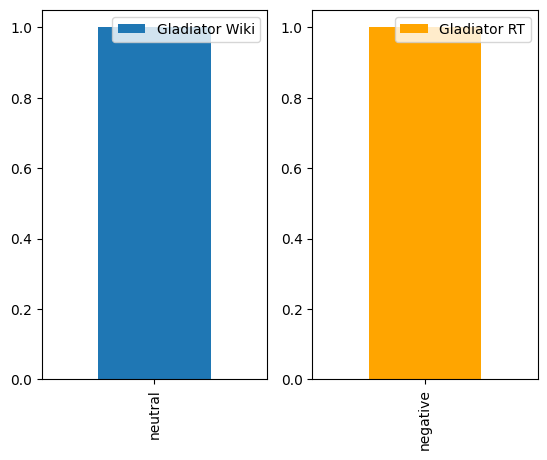

In [ ]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Gladiator Wiki'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Gladiator RT'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать **рефакторинг**: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is
Civil War is not a film about why extreme division happens; it’s about the personal impact of divisi
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'a

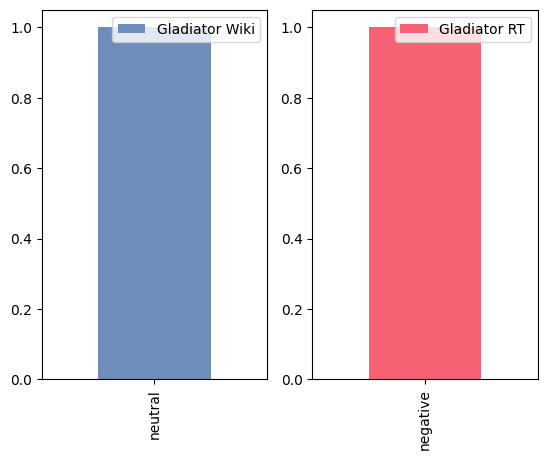

In [ ]:
def scrape_text_from_url(url, tag, class_=None):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        return ' '.join(p.get_text() for p in soup.find_all(tag, class_=class_)) # команда join, чтобы запитонироват цикл for
    except requests.exceptions.RequestException as i:
        print(f'Error: {i}')
        return None
scrape1, scrape2 = scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')[:100], scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')[:100]
print("\n".join([f"{scrape1}", f"{scrape2}"]))

!wget -q -O neg.txt https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget -q -O pos.txt https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
neg, pos = (open(file).read() for file in ['neg.txt', 'pos.txt']) # две строки в одну

pos_list, neg_list = pos.split('\n'), neg.split('\n')
print("\n".join([f"{pos_list}", f"{neg_list}"]))

def analyze_sentiment(text, positive_words, negative_words):
    words = [word.strip(string.punctuation) for word in text.lower().split()] # две строки в одну
    stopwords_en = set(stopwords.words('english'))
    new_words = [word for word in words if word not in stopwords_en]
    positive_count, negative_count = sum(word in positive_words for word in new_words), sum(word in negative_words for word in new_words) # две строки в одну

    if positive_count > negative_count:
        return 'positive'
    elif positive_count < negative_count:
        return 'negative'
    return 'neutral'
test1, test2, test3 = analyze_sentiment('This sample text is awesome!', pos_list, neg_list), analyze_sentiment('I hate this sample text.', pos_list, neg_list), analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list) # 2 in 1
print("\n".join([f"{test1}", f"{test2}",f"{test3}"]))

def analyse(positive_words, negative_words, url, tag, class_=None):
    scraped_text = scrape_text_from_url(url, tag, class_)
    return [analyze_sentiment(sentence, positive_words, negative_words) for sentence in scraped_text.split('.')]

sample1, sample2 = Counter(analyze(url='https://en.wikipedia.org/wiki/Gladiator_(2000_film)', tag='p', positive_words=pos, negative_words=neg)), Counter(analyze(url='https://www.rottentomatoes.com/m/gladiator/reviews?type=user', tag='p', positive_words=pos, negative_words=neg))
print("\n".join([f"{sample1}", f"{sample2}"]))

df1, df2 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Gladiator Wiki']), pd.DataFrame.from_dict(sample2, orient='index', columns=['Gladiator RT'])

fig, ax = plt.subplots(ncols=2)
ax[0] = df1.plot.bar(ax=ax[0], color='#6D8EBB')
ax[1] = df2.plot.bar(ax=ax[1], color='#F76174')